Setup

In [11]:
from spatial_italy.data import (
    request_confini_amministrativi_comuni,
    request_POSAS_2023_it_Comuni,
)
import geopandas as gpd
import json

# Data

In [12]:
COMUNI = [
    "Milano", 
    "Roma", 
    "Napoli", 
    "Castro",  # included to test a duplicate municipality names
    "Vandoies",  # included to test bilingual names
    ]

# Fixture

## POSAS_2023_it_Comuni

In [4]:
# Subset only for 2 age bins
df = request_POSAS_2023_it_Comuni()
sample = df[(df["Età"].isin([16,74])) & (df.Comune.isin(COMUNI))].to_dict(orient="tight")
sample

{'index': [181066,
  181124,
  193612,
  193670,
  281026,
  281084,
  482170,
  482228,
  521440,
  521498,
  618646,
  618704],
 'columns': ['Codice comune',
  'Comune',
  'Età',
  'Totale maschi',
  'Totale femmine'],
 'data': [[15146, 'Milano', 16, 6430, 5957],
  [15146, 'Milano', 74, 5691, 7572],
  [16065, 'Castro', 16, 4, 5],
  [16065, 'Castro', 74, 11, 17],
  [21110, 'Vandoies', 16, 14, 13],
  [21110, 'Vandoies', 74, 9, 13],
  [58091, 'Roma', 16, 13884, 13081],
  [58091, 'Roma', 74, 12599, 16446],
  [63049, 'Napoli', 16, 5283, 4962],
  [63049, 'Napoli', 74, 4318, 5340],
  [75096, 'Castro', 16, 10, 9],
  [75096, 'Castro', 74, 28, 12]],
 'index_names': [None],
 'column_names': [None]}

## Confini amministrativi comuni

In [13]:
gdf = request_confini_amministrativi_comuni()
sample = gdf[gdf.COMUNE.isin(COMUNI)]
sample.loc[:, "geometry"] = sample.simplify(1e4)  # Serialize less points
sample = json.loads(sample.to_json())
sample

{'type': 'FeatureCollection',
 'features': [{'id': '430',
   'type': 'Feature',
   'properties': {'COD_RIP': 2,
    'COD_REG': 4,
    'COD_PROV': 21,
    'COD_CM': 0,
    'COD_UTS': 21,
    'PRO_COM': 21110,
    'PRO_COM_T': '021110',
    'COMUNE': 'Vandoies',
    'COMUNE_A': 'Vintl',
    'CC_UTS': 0,
    'Shape_Leng': 60124.5951433},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[708188.5301000001, 5203226.8192],
      [708362.4009999996, 5188786.8344],
      [711254.585, 5186030.8365],
      [705157.9670000002, 5187876.336200001],
      [698950.1639, 5200366.3248],
      [708188.5301000001, 5203226.8192]]]}},
  {'id': '1949',
   'type': 'Feature',
   'properties': {'COD_RIP': 1,
    'COD_REG': 3,
    'COD_PROV': 15,
    'COD_CM': 215,
    'COD_UTS': 215,
    'PRO_COM': 15146,
    'PRO_COM_T': '015146',
    'COMUNE': 'Milano',
    'COMUNE_A': None,
    'CC_UTS': 1,
    'Shape_Leng': 79382.9940082},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[513714.53839999996, 

In [15]:
gdf = gpd.GeoDataFrame.from_features(sample)

In [17]:
gdf.crs = "epsg:32632"

<Axes: >

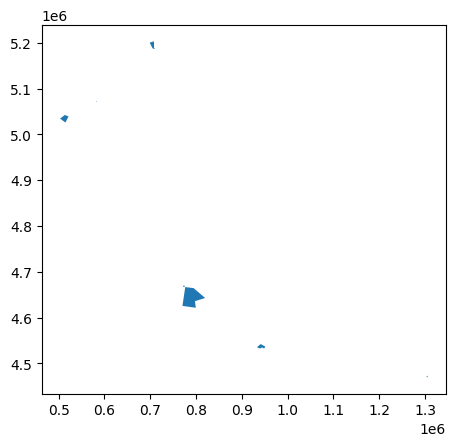

In [18]:
gdf.plot()